In [9]:
import sys
import os
import time
import argparse
from collections import OrderedDict

# import torch
# import torch.nn as nn
# import torch.backends.cudnn as cudnn
# from torch.autograd import Variable

from PIL import Image, ImageDraw

# import cv2
# from skimage import io
# import numpy as np
# import craft_utils
# import imgproc
# import file_utils
# import json
# import zipfile

# from craft import CRAFT

tesseract 4.0.0-beta.1
 leptonica-1.75.3
  libgif 5.1.4 : libjpeg 8d (libjpeg-turbo 1.5.2) : libpng 1.6.34 : libtiff 4.0.9 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.3.0

('/usr/share/tesseract-ocr/4.00/tessdata/', ['eng', 'osd'])
Found 0 textline image components.


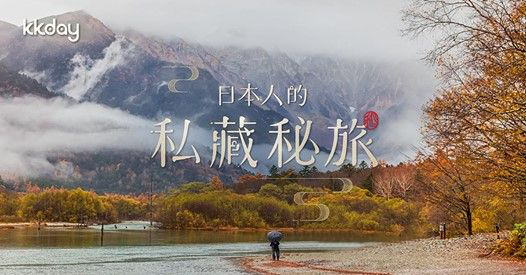

In [10]:
##### from PIL import Image, ImageDraw
import tesserocr
from tesserocr import PyTessBaseAPI, RIL

im = Image.open('tmp/fb8a7b30bcb8ace3e88565e7617fc87c.jpg')
draw = ImageDraw.Draw(im)
# draw.rectangle((500, 500, 600, 550), fill=255)

print(tesserocr.tesseract_version()) 
print(tesserocr.get_languages())

with PyTessBaseAPI() as api:
    api.SetImage(im)
#     boxes = api.GetComponentImages(RIL.TEXTLINE, True)
    boxes = api.GetComponentImages(RIL.BLOCK, True)
    print('Found {} textline image components.'.format(len(boxes)))
    for i, (_im, box, _, _) in enumerate(boxes):
#         # im is a PIL image object
#         # box is a dict with x, y, w and h keys
        api.SetRectangle(box['x'], box['y'], box['w'], box['h'])
        ocrResult = api.GetUTF8Text()
        conf = api.MeanTextConf()
        print(conf, ocrResult)
        draw.rectangle((box['x'], box['y'], box['x']+box['w'], box['y']+box['h']), fill=None, outline=(255, 0, 0))
#         print("Box[{0}]: x={x}, y={y}, w={w}, h={h}, confidence: {1}, text: {2}").format(i, conf, ocrResult, **box)
im

In [2]:
net = CRAFT()  # initialize
state_dict = torch.load("craft_mlt_25k.pth", map_location="cpu")

new_state_dict = OrderedDict()
for k, v in state_dict.items():
    name = k.replace("module.", "")  # remove 'module.' of dataparallel
    new_state_dict[name] = v

net.load_state_dict(new_state_dict)
net.eval()
None

In [3]:
image = imgproc.loadImage("data/0e2f315f1f068638932de997005ff9a6.jpg")
img_resized, target_ratio, size_heatmap = imgproc.resize_aspect_ratio(
        image,
        1280,
        interpolation=cv2.INTER_LINEAR,
        mag_ratio=1.5,
    )
ratio_h = ratio_w = 1 / target_ratio

# preprocessing
x = imgproc.normalizeMeanVariance(img_resized)
x = torch.from_numpy(x).permute(2, 0, 1)  # [h, w, c] to [c, h, w]
x = Variable(x.unsqueeze(0))  # [c, h, w] to [b, c, h, w]

# forward pass
y, _ = net(x)

# make score and link map
# score_text = y[0, :, :, 0].cpu().data.numpy()
# score_link = y[0, :, :, 1].cpu().data.numpy()

# render results (optional)
# render_img = score_text.copy()
# render_img = np.hstack((render_img, score_link))
# ret_score_text = imgproc.cvt2HeatmapImg(render_img)

In [1]:
# np.max(render_img*255)
# render_img.shape
import torchvision.transforms as transforms

y[0, :, :, 0].unsqueeze(2).shape

# render_img = score_text.copy()
# render_img = np.expand_dims(render_img, 0)

# render_img = torch.Tensor(render_img)
# render_img = torch.clamp(render_img, 0, 1)
# render_img = render_img * (render_img > 0.01).float()
# render_img
# render_img.shape

photo = Image.open('/notebooks/CRAFT-pytorch/data/0a7c18c4c6c89108254a07b8a4cc1641.jpg')
mask = Image.open('/notebooks/CRAFT-pytorch/result/0a7c18c4c6c89108254a07b8a4cc1641_mask.png')

# transform = transforms.ToPILImage()
# transform(render_img)

# ret_score_text = cv2.cvtColor(ret_score_text,cv2.COLOR_BGR2RGB)
# pil_im = Image.fromarray(ret_score_text)
# pil_im
# Image.fromarray(render_img * 255, mode='L')
photo

NameError: name 'y' is not defined